Project Overview

This script processes a cinema ticket sales dataset to analyze and predict total sales using multiple
machine learning models.
It includes data visualizations, feature selection, data preprocessing, and training of 
Decision Tree, XGBoost, MLP, KNN, and Lasso models.
The goal is to evaluate and compare model performance based on Mean Absolute Error (MAE) and R-squared (R²) scores.

Dataset Information

The dataset used in this script contains cinema ticket sales data, including various features 
influencing total sales.
Key attributes include the number of tickets sold, ticket prices, show times, occupancy percentages, 
cinema capacity, and temporal features such as month, quarter, and day.
The dataset is preprocessed by handling missing values and scaling numerical features before training 
the machine learning models.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
#This function from pandas loads the CSV (Comma-Separated Values) file into a DataFrame.
df = pd.read_csv(r"C:\Users\kinga\Downloads\cinemaTicket_Ref.csv\cinemaTicket_Ref.csv")
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [13]:
#it display the first five rows of the dataset stored in df (by default, it shows 5 rows, but you can specify a different number, e.g., df.head(10)).
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [15]:
#This method provides a summary of the dataset, helping to understand its structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [17]:
#Provides descriptive statistics for numerical columns in the dataset.
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [19]:
#Returns the dimensions of the dataset as a tuple: (rows, columns).
df.shape

(142524, 14)

Exploratory Data Analysis (EDA)

EDA is performed to gain insights into the dataset before applying machine learning models.
- The distribution of total sales is analyzed using histograms.
- The relationship between tickets sold and ticket price is visualized through scatter plots.
- Trends in occupancy percentage over time are explored.
- Monthly variations in total sales are examined using boxplots.
- Show time distribution is analyzed to understand peak hours.
- Correlation heatmaps are used to identify relationships between features.

Text(0.5, 1.0, 'Distribution of Total Sales')

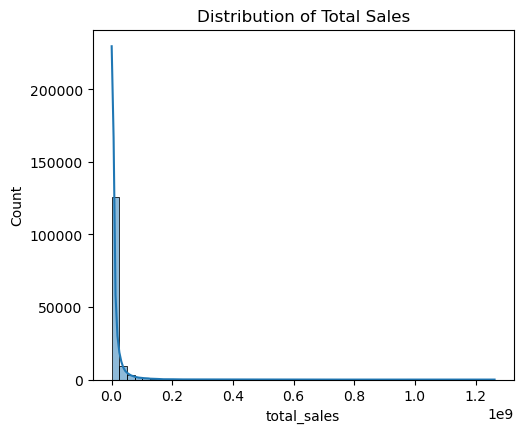

In [22]:
# 1. Distribution of total sales
plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 1)
sns.histplot(df['total_sales'], bins=50, kde=True)
plt.title('Distribution of Total Sales')

Text(0.5, 1.0, 'Tickets Sold vs Ticket Price')

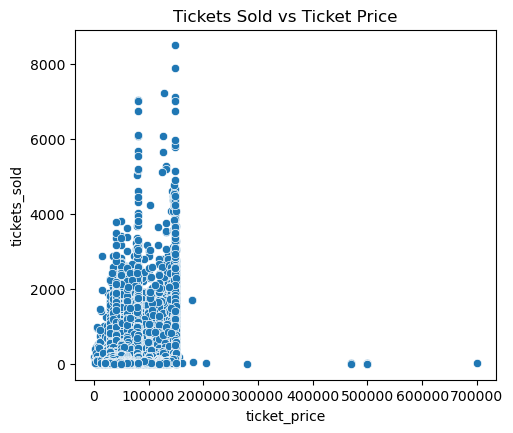

In [24]:
# 2. Tickets sold vs. ticket price 
plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 2)
sns.scatterplot(x=df['ticket_price'], y=df['tickets_sold'])
plt.title('Tickets Sold vs Ticket Price')

Text(0.5, 1.0, 'Occupancy Percentage Over Time')

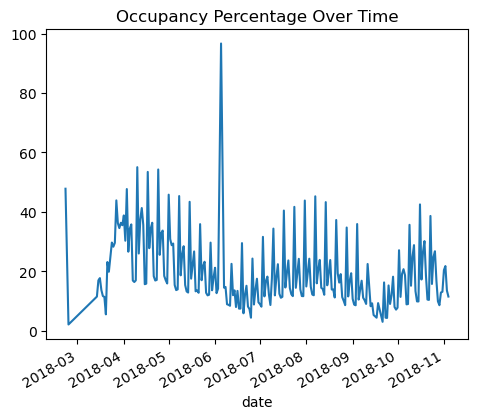

In [25]:
# 3. Occupancy percentage over time 
plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 3)
df['date'] = pd.to_datetime(df['date'])
df.groupby('date')['occu_perc'].mean().plot()
plt.title('Occupancy Percentage Over Time')

Text(0.5, 1.0, 'Total Sales per Month')

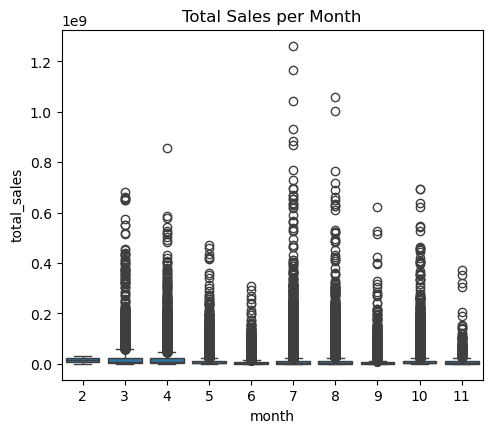

In [28]:
# 4. Total sales per month
plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 4)
sns.boxplot(x=df['month'], y=df['total_sales'])
plt.title('Total Sales per Month')

Text(0.5, 1.0, 'Show Time Distribution')

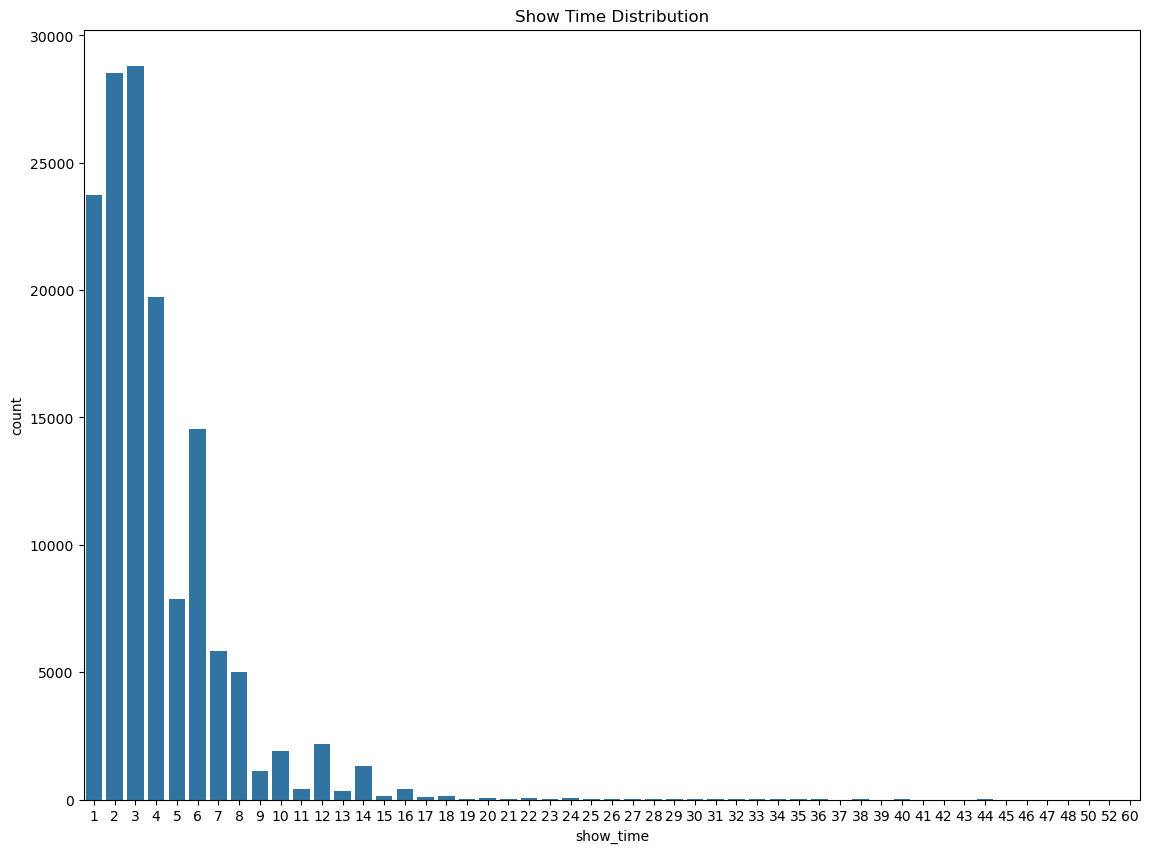

In [30]:
# 5. Show time distribution 
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 2)
sns.countplot(x=df['show_time'])
plt.title('Show Time Distribution')

Text(0.5, 1.0, 'Ticket Price Distribution')

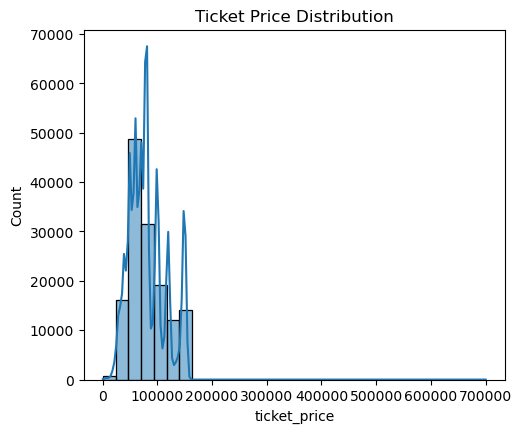

In [31]:
# 6. Ticket price distribution
plt.figure(figsize=(25, 10))
plt.subplot(2, 4, 6)
sns.histplot(df['ticket_price'], bins=30, kde=True)
plt.title('Ticket Price Distribution')

Text(0.5, 1.0, 'Feature Correlations')

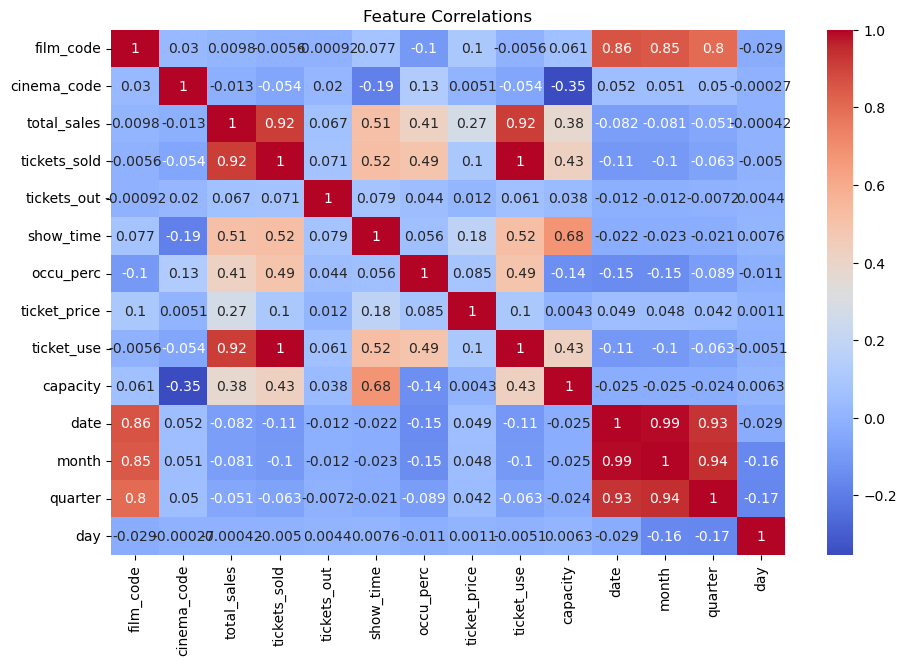

In [33]:
# 7. Heatmap of feature correlations 
plt.figure(figsize=(50, 15))
plt.subplot(2, 4, 7)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')

Text(0.5, 1.0, 'Top 10 Cinemas by Total Sales')

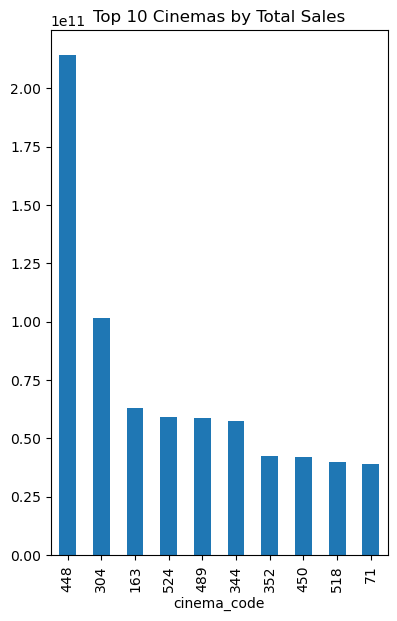

In [35]:
# 8. Total sales per cinema 
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 8)
df.groupby('cinema_code')['total_sales'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Cinemas by Total Sales')

In [38]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Machine Learning Models Used

Decision Tree Regressor: A tree-based model that splits the data into branches to make predictions.
MLP Regressor: A neural network model capable of capturing complex relationships.
KNN Regressor: A distance-based model that predicts using the nearest neighbors.
Lasso Regression: A linear model that helps with feature selection by applying L1 regularization

In [41]:
# Prepare data for ML 
features = ['tickets_sold', 'ticket_price', 'show_time', 'occu_perc', 'capacity', 'month', 'quarter', 'day']
target = 'total_sales'
df.dropna(inplace=True)
X = df[features]
y = df[target]

In [43]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Train models 
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,50), max_iter=2000, 
                                   random_state=42, learning_rate_init=0.001),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Lasso Regression': Lasso(alpha=0.1)
}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred):.2f}, R²: {r2_score(y_test, y_pred):.2f}")

Decision Tree - MAE: 120215.10, R²: 1.00
MLP Regressor - MAE: 2391810.50, R²: 0.95
KNN Regressor - MAE: 1427489.91, R²: 0.98
Lasso Regression - MAE: 4954808.62, R²: 0.87


Model Evaluation

The models were evaluated based on two key metrics:

Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.
R-squared (R²): Indicates how well the model explains the variance in the target variable.
Decision Tree: Performs well but risks overfitting due to its nature. 
MLP Regressor: A neural network model with moderate accuracy that requires further fine-tuning. 
KNN Regressor: Performs decently but struggles with high-dimensional data. 
Lasso Regression: Helps in feature selection but has limitations in capturing complex patterns.

Results

The performance of the models is evaluated based on MAE and R² scores.
Lower MAE values indicate better predictive accuracy, while higher R² values suggest a stronger fit to the data.
Decision Tree performed well but may overfit due to its nature. 
MLP Regressor, as a neural network model, exhibited moderate performance and required fine-tuning.
KNN Regressor struggled with high-dimensional data but performed decently in local trends. 
Lasso Regression, a linear model, was useful for feature selection but had limitations in capturing complex patterns